In [83]:
#
#T. Bradford
#June 2021

# Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
import pandas as pd
from pandas_datareader import data
import mplfinance as mpf



## Cryptocurrencies Data collection

Using the pandas DataReader library to request data from Yahoo Finance for the Cryptocurrencies that will bebe sampled.

In [84]:
#Bitcoin ticker symbol is BTC-USD
#Etheremum ticker symbol is ETH-USD
#Dogecoin ticker symbol is DOGE-USD
#Cardano ticker symbol is ADA-USD
#creat a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","ADA-USD",]

#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"

#creat dataframe
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)

#print to see structure
print(crypto_list_df)

Attributes    Adj Close                                        Close  \
Symbols         BTC-USD     ETH-USD  DOGE-USD   ADA-USD      BTC-USD   
Date                                                                   
2018-05-31  7541.450195  580.043030  0.003423  0.222507  7541.450195   
2018-06-01  7643.450195  591.807983  0.003558  0.227742  7643.450195   
2018-06-02  7720.250000  618.328979  0.003690  0.228154  7720.250000   
2018-06-03  7514.470215  592.984985  0.003532  0.214012  7514.470215   
2018-06-04  7633.759766  609.302979  0.003654  0.220467  7633.759766   
...                 ...         ...       ...       ...          ...   
2020-06-26  9045.390625  222.959793  0.002313  0.077679  9045.390625   
2020-06-27  9143.582031  225.347168  0.002326  0.080392  9143.582031   
2020-06-28  9190.854492  228.194870  0.002313  0.083870  9190.854492   
2020-06-29  9137.993164  226.315002  0.002320  0.083116  9137.993164   
2020-06-30  9228.325195  231.113419  0.002354  0.095954  9228.32

In [85]:
#creat dataframe multiple indexes
crypto_list_df

Attributes    Adj Close                                        Close  \
Symbols         BTC-USD     ETH-USD  DOGE-USD   ADA-USD      BTC-USD   
Date                                                                   
2018-05-31  7541.450195  580.043030  0.003423  0.222507  7541.450195   
2018-06-01  7643.450195  591.807983  0.003558  0.227742  7643.450195   
2018-06-02  7720.250000  618.328979  0.003690  0.228154  7720.250000   
2018-06-03  7514.470215  592.984985  0.003532  0.214012  7514.470215   
2018-06-04  7633.759766  609.302979  0.003654  0.220467  7633.759766   
...                 ...         ...       ...       ...          ...   
2020-06-26  9045.390625  222.959793  0.002313  0.077679  9045.390625   
2020-06-27  9143.582031  225.347168  0.002326  0.080392  9143.582031   
2020-06-28  9190.854492  228.194870  0.002313  0.083870  9190.854492   
2020-06-29  9137.993164  226.315002  0.002320  0.083116  9137.993164   
2020-06-30  9228.325195  231.113419  0.002354  0.095954  9228.325195   

Attributes                                         High              ...  \
Symbols        ETH-USD  DOGE-USD   ADA-USD      BTC-USD     ETH-USD  ...   
Date                                                                 ...   
2018-05-31  580.043030  0.003423  0.222507  7604.729980  589.093018  ...   
2018-06-01  591.807983  0.003558  0.227742  7695.830078  597.077026  ...   
2018-06-02  618.328979  0.003690  0.228154  7754.890137  624.513000  ...   
2018-06-03  592.984985  0.003532  0.214012  7753.819824  623.429016  ...   
2018-06-04  609.302979  0.003654  0.220467  7643.229980  611.330017  ...   
...                ...       ...       ...          ...         ...  ...   
2020-06-26  222.959793  0.002313  0.077679  9207.810547  232.493423  ...   
2020-06-27  225.347168  0.002326  0.080392  9197.546875  228.598282  ...   
2020-06-28  228.194870  0.002313  0.083870  9237.573242  229.903214  ...   
2020-06-29  226.315002  0.002320  0.083116  9217.835938  229.476807  ...   
2020-06-30  231.113419  0.002354  0.095954  9309.754883  232.756119  ...   

Attributes       Low                   Open                                  \
Symbols     DOGE-USD   ADA-USD      BTC-USD     ETH-USD  DOGE-USD   ADA-USD   
Date                                                                          
2018-05-31  0.003336  0.216955  7500.700195  578.671997  0.003427  0.224533   
2018-06-01  0.003400  0.219242  7536.720215  580.429016  0.003418  0.222701   
2018-06-02  0.003545  0.225118  7632.089844  591.258972  0.003576  0.227700   
2018-06-03  0.003512  0.212290  7722.529785  619.437012  0.003691  0.228155   
2018-06-04  0.003514  0.204815  7500.899902  593.406006  0.003538  0.214247   
...              ...       ...          ...         ...       ...       ...   
2020-06-26  0.002294  0.076109  9167.824219  229.631485  0.002359  0.080558   
2020-06-27  0.002283  0.076251  9048.460938  222.914490  0.002313  0.077679   
2020-06-28  0.002301  0.080338  9140.029297  225.361435  0.002326  0.080392   
2020-06-29  0.002297  0.082026  9185.581055  227.968430  0.002311  0.083848   
2020-06-30  0.002301  0.082533  9145.985352  226.134583  0.002320  0.083112   

Attributes        Volume                                          
Symbols          BTC-USD       ETH-USD     DOGE-USD      ADA-USD  
Date                                                              
2018-05-31  4.921460e+09  1.945890e+09    5436780.0  130538000.0  
2018-06-01  4.939300e+09  1.880390e+09    5918490.0  116435000.0  
2018-06-02  4.851760e+09  1.832550e+09   19570200.0  117208000.0  
2018-06-03  4.993170e+09  1.903430e+09   22162200.0  115605000.0  
2018-06-04  4.961740e+09  1.844270e+09   18819700.0  119846000.0  
...                  ...           ...          ...          ...  
2020-06-26  1.727309e+10  6.918381e+09  152534000.0  148184221.0  
2020-06-27  1.456087e+10  6.205926e+09  172693834.0  188871401.0  
2020-06-28  1.646055e+10  6.726165e+09  172655788.0  275593607.0  
2020-06-29  1.5

## Data Cleaning and Plotting

Creating new dataframes by specific attributes and plotting

In [86]:
#filter out daily high rename columns
crypto_high = crypto_list_df.High.rename(columns={"BTC-USD": "Bitcoin High", "ETH-USD": "Ethereum High","DOGE-USD":"Dogecoin High", "ADA-USD":"Cardano High", "Symbols":"" })

#save to csv
crypto_high.to_csv("output/crypto_high.csv")

#display
crypto_high = crypto_high

crypto_high.head()
#print(crypto_high)

Symbols     Bitcoin High  Ethereum High  Dogecoin High  Cardano High
Date                                                                
2018-05-31   7604.729980     589.093018       0.003469      0.229184
2018-06-01   7695.830078     597.077026       0.003584      0.229531
2018-06-02   7754.890137     624.513000       0.003750      0.236761
2018-06-03   7753.819824     623.429016       0.003760      0.231228
2018-06-04   7643.229980     611.330017       0.003722      0.221728

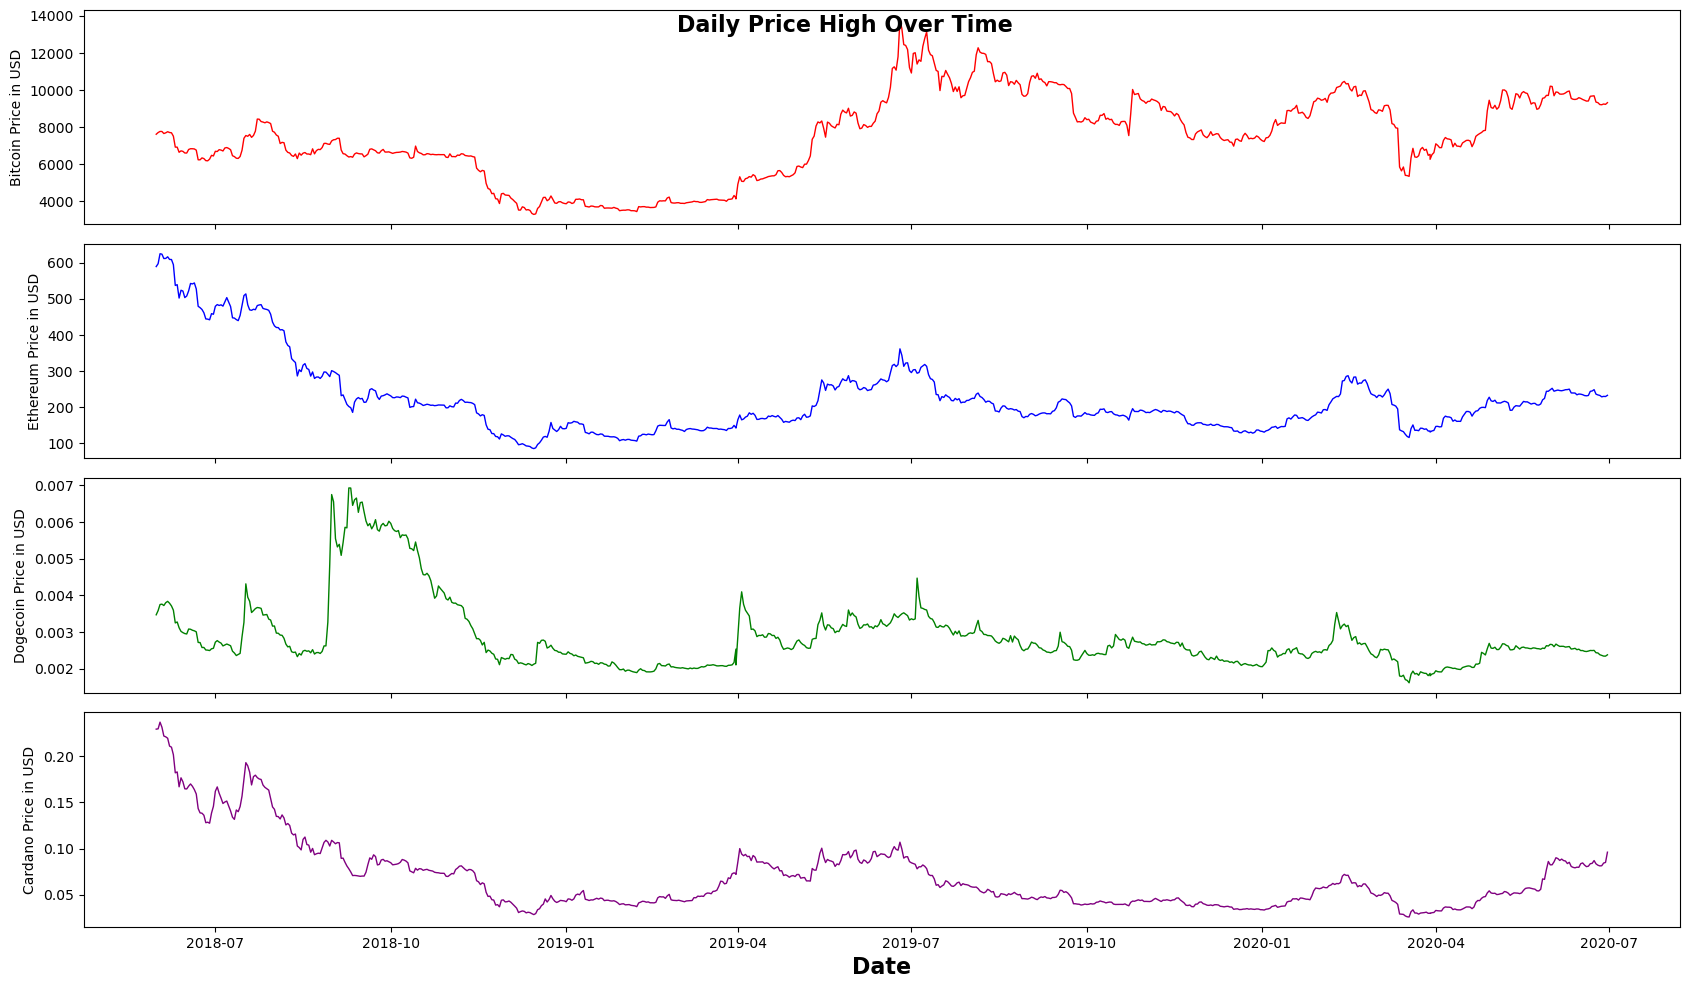

In [87]:
# Generate a facet plot of all 4 Cryptocurrencies High

#multiple indexes making Date a series
crypto_high_no_date_index = crypto_high.reset_index()

date_range = crypto_high_no_date_index["Date"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Daily Price High Over Time", fontsize=16, fontweight="bold")

ax1.plot(date_range, crypto_high["Bitcoin High"], linewidth=1, color ="red")
ax1.set_ylabel("Bitcoin Price in USD")

ax2.plot(date_range, crypto_high["Ethereum High"], linewidth=1, color ="blue")
ax2.set_ylabel("Ethereum Price in USD")

ax3.plot(date_range, crypto_high["Dogecoin High"], linewidth=1,color ="green")
ax3.set_ylabel("Dogecoin Price in USD")

ax4.plot(date_range, crypto_high["Cardano High"], linewidth=1, color ="purple")
ax4.set_ylabel("Cardano Price in USD")
ax4.set_xlabel("Date",fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/crypto_high.png")

plt.tight_layout()
plt.show()


In [88]:
#filter out daily low
crypto_low = crypto_list_df.Low.rename(columns={"BTC-USD": "Bitcoin Low", "ETH-USD": "Ethereum Low","DOGE-USD":"Dogecoin Low", "ADA-USD":"Cardano Low" })
#save to csv
crypto_low.to_csv("output/crypto_low.csv")
#display
crypto_low.head()

Symbols     Bitcoin Low  Ethereum Low  Dogecoin Low  Cardano Low
Date                                                            
2018-05-31  7407.339844    567.664978      0.003336     0.216955
2018-06-01  7497.259766    577.322021      0.003400     0.219242
2018-06-02  7613.040039    591.258972      0.003545     0.225118
2018-06-03  7474.040039    583.747009      0.003512     0.212290
2018-06-04  7397.000000    580.981995      0.003514     0.204815

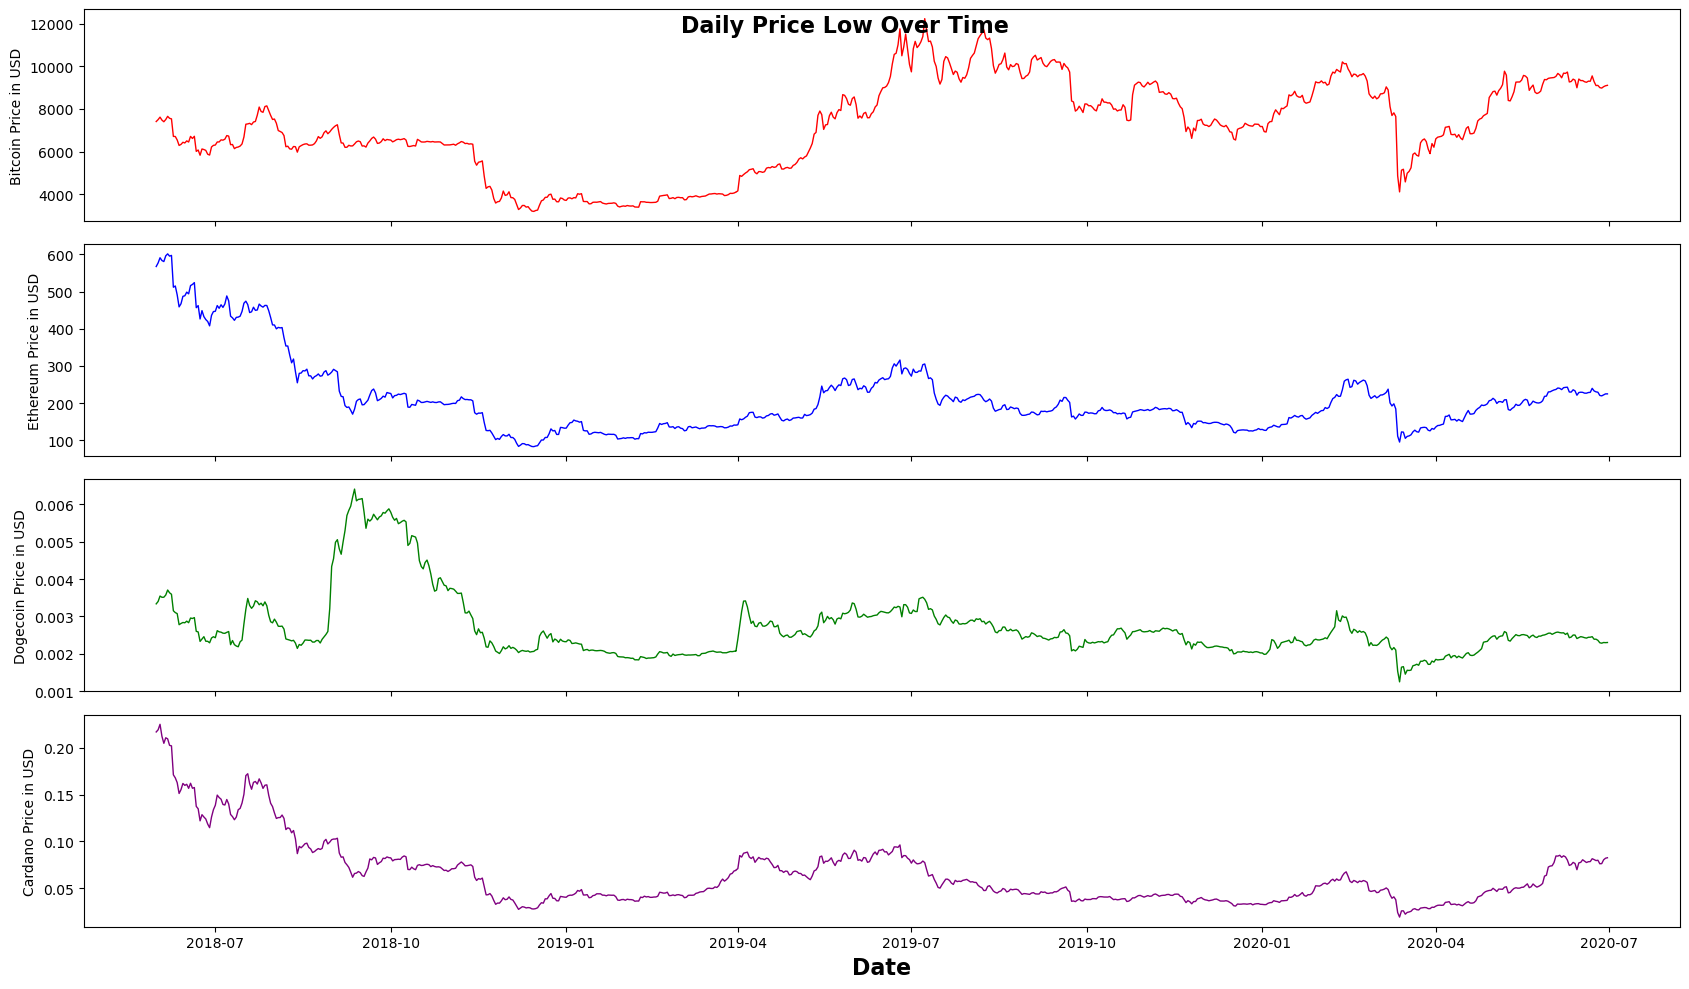

In [89]:
# Generate a facet plot of all 4 Cryptocurrencies Low

#multiple indexes making Date a series
crypto_low_no_date_index = crypto_low.reset_index()

date_range = crypto_low_no_date_index["Date"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Daily Price Low Over Time", fontsize=16, fontweight="bold")

ax1.plot(date_range, crypto_low["Bitcoin Low"], linewidth=1, color ="red")
ax1.set_ylabel("Bitcoin Price in USD")

ax2.plot(date_range, crypto_low["Ethereum Low"], linewidth=1, color ="blue")
ax2.set_ylabel("Ethereum Price in USD")

ax3.plot(date_range, crypto_low["Dogecoin Low"], linewidth=1,color ="green")
ax3.set_ylabel("Dogecoin Price in USD")

ax4.plot(date_range, crypto_low["Cardano Low"], linewidth=1, color ="purple")
ax4.set_ylabel("Cardano Price in USD")
ax4.set_xlabel("Date",fontsize=16, fontweight="bold")



#save plot
plt.savefig("output/crypto_low.png")

plt.tight_layout()
plt.show()

In [90]:
#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Ethereum Volume","DOGE-USD":"Dogecoin Volume", "ADA-USD":"Cardano Volume" })
#save to csv
crypto_volume.to_csv("output/crypto_volume.csv")
#display
crypto_volume.head()

Symbols     Bitcoin Volume  Ethereum Volume  Dogecoin Volume  Cardano Volume
Date                                                                        
2018-05-31    4.921460e+09     1.945890e+09        5436780.0     130538000.0
2018-06-01    4.939300e+09     1.880390e+09        5918490.0     116435000.0
2018-06-02    4.851760e+09     1.832550e+09       19570200.0     117208000.0
2018-06-03    4.993170e+09     1.903430e+09       22162200.0     115605000.0
2018-06-04    4.961740e+09     1.844270e+09       18819700.0     119846000.0

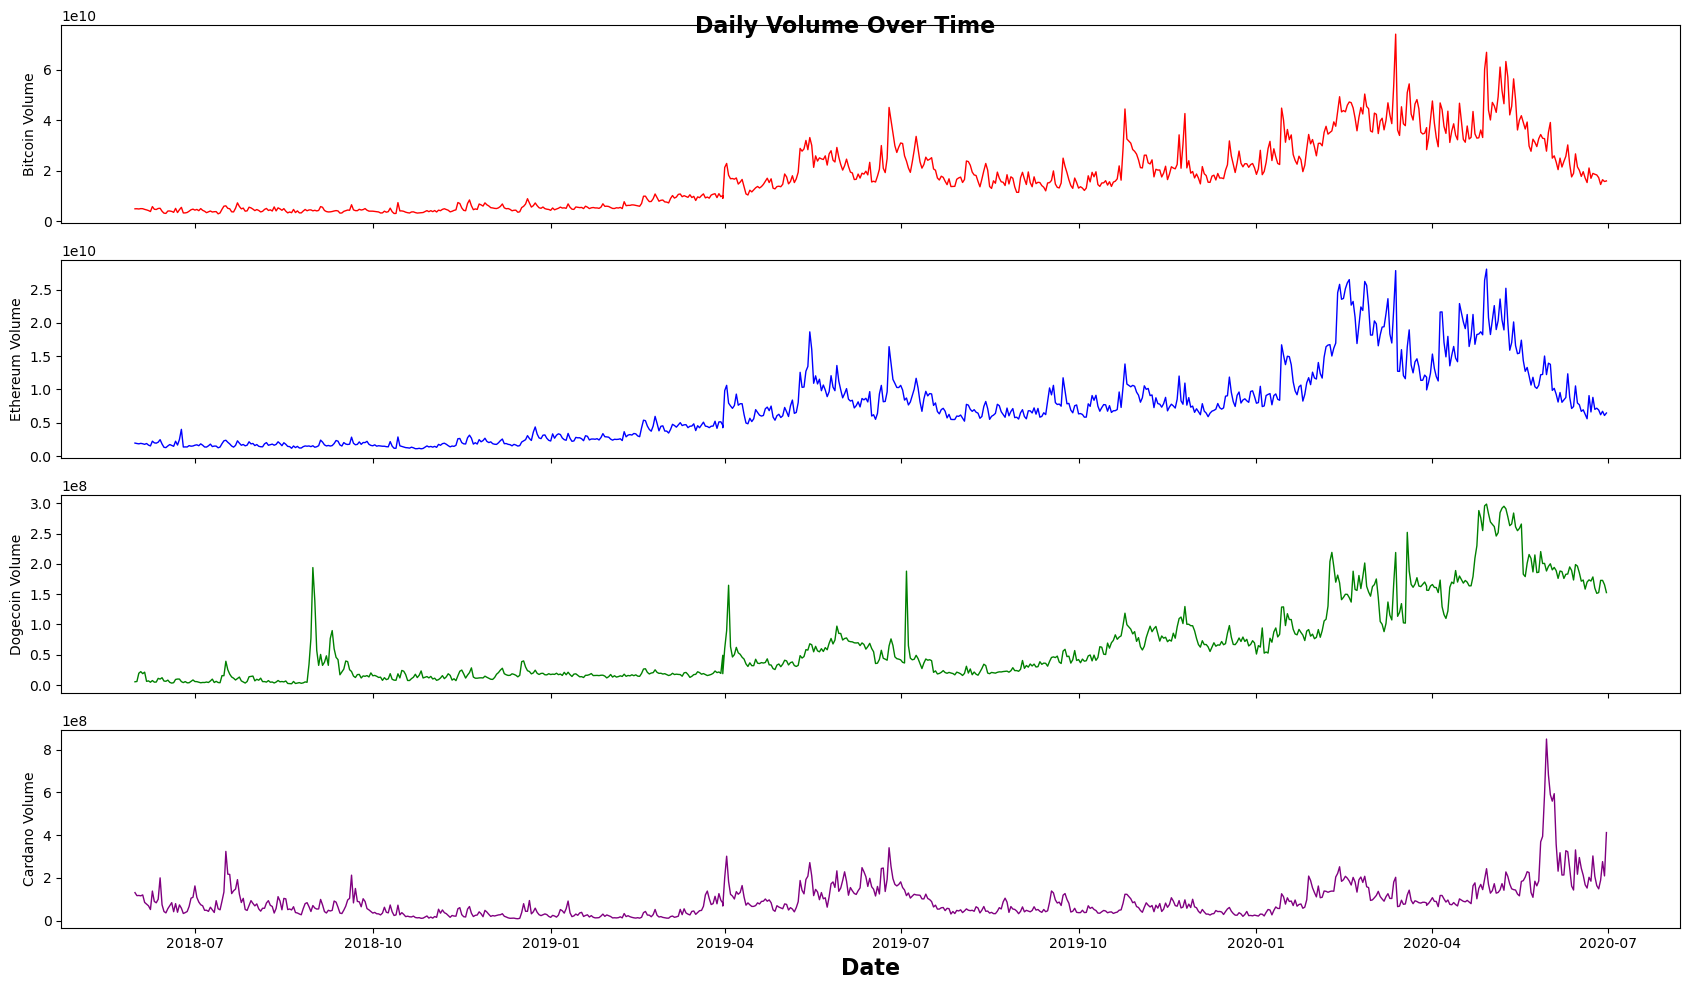

In [91]:
# Generate a facet plot of all 4 Cryptocurrencies volume

#multiple indexes making Date a series
crypto_volume_no_date_index = crypto_volume.reset_index()

date_range = crypto_volume_no_date_index["Date"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Daily Volume Over Time", fontsize=16, fontweight="bold")

ax1.plot(date_range, crypto_volume["Bitcoin Volume"], linewidth=1, color ="red")
ax1.set_ylabel("Bitcoin Volume")

ax2.plot(date_range, crypto_volume["Ethereum Volume"], linewidth=1, color ="blue")
ax2.set_ylabel("Ethereum Volume")

ax3.plot(date_range, crypto_volume["Dogecoin Volume"], linewidth=1,color ="green")
ax3.set_ylabel("Dogecoin Volume")

ax4.plot(date_range, crypto_volume["Cardano Volume"], linewidth=1, color ="purple")
ax4.set_ylabel("Cardano Volume")
ax4.set_xlabel("Date", fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/crypto_volume.png")

plt.tight_layout()
plt.show()

In [92]:
#define colors for candles
change_color = mpf.make_marketcolors(up ="green", down="red")
market_style = mpf.make_mpf_style(marketcolors = change_color)

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


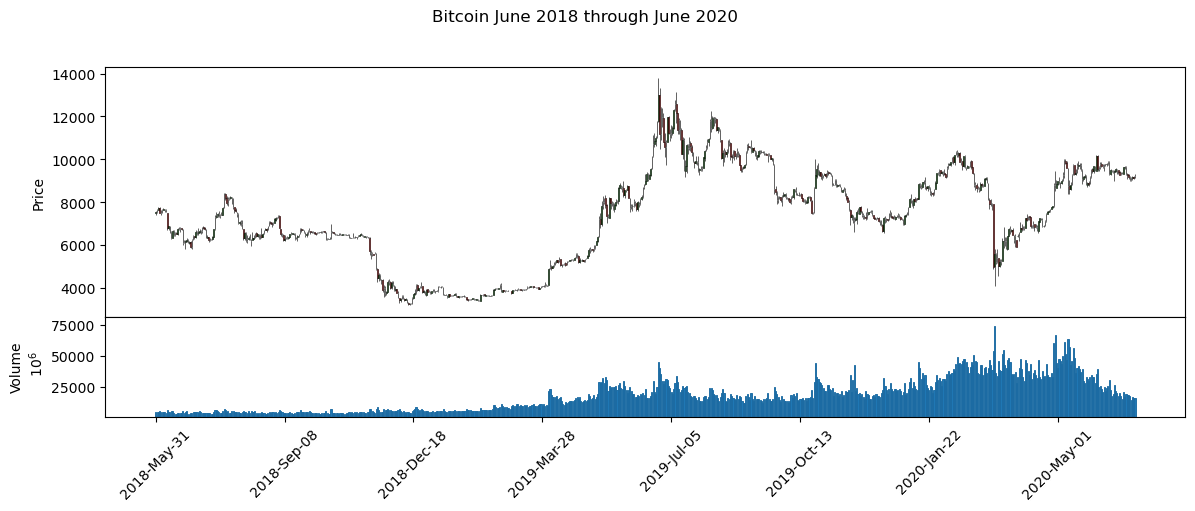

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


In [93]:
#bitcoin price and volume june 2018 - june 2020
bitcoin_june18 =data.DataReader("BTC-USD", "yahoo", "2018-06-01","2020-06-30")

#plot
bitcoin_june18_plot = mpf.plot(bitcoin_june18, type="candle", title='Bitcoin June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
bitcoin_june18_plot= mpf.plot(bitcoin_june18, type='candle', title='Bitcoin June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5),savefig =("output/bitcoin_june2018-2020.png"))

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


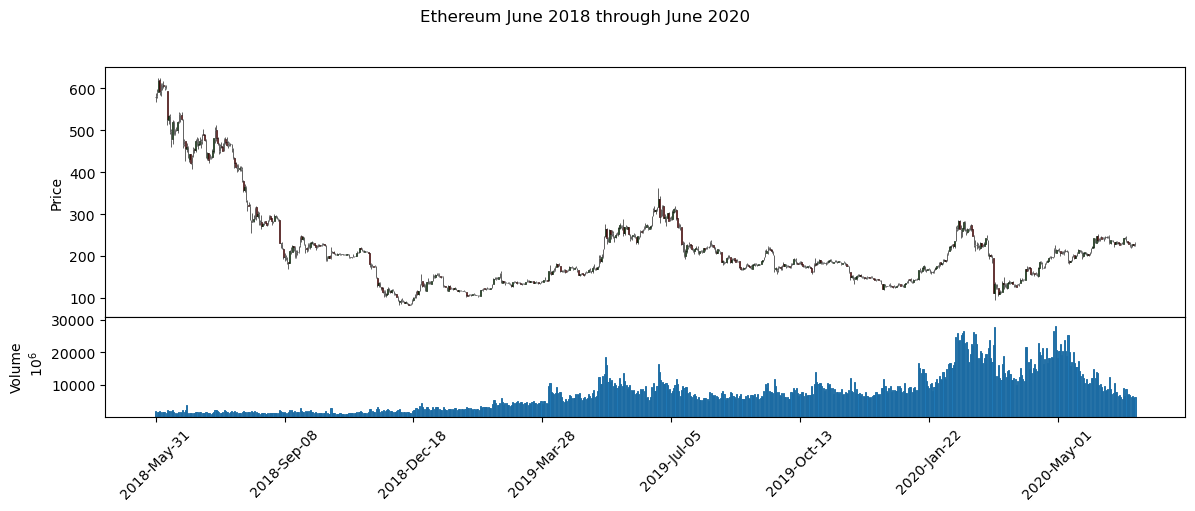

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


In [94]:
#etheremum price and volume june 2018 - june 2020
ethereum_june18 =data.DataReader("ETH-USD", "yahoo", "2018-06-01","2020-06-30")

#plot
ethereum_june18_plot = mpf.plot(ethereum_june18, type='candle', title='Ethereum June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
ethereum_june18_plot = mpf.plot(ethereum_june18, type='candle', title='Ethereum June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/ethereum_june2018-2020.png"))



C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


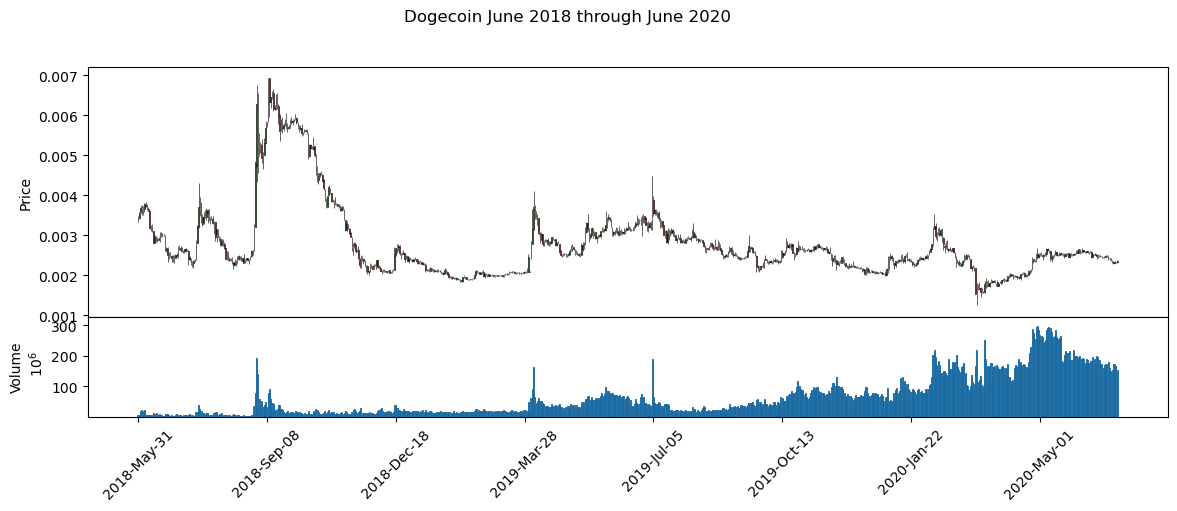

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


In [95]:
#dogecoin price and volume june 2018 - june 2020
dogecoin_june18 =data.DataReader("DOGE-USD", "yahoo", "2018-06-01","2020-06-30")

#plot
dogecoin_june18_plot = mpf.plot(dogecoin_june18, type='candle', title='Dogecoin June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
dogecoin_june18_plot = mpf.plot(dogecoin_june18, type='candle', title='Dogecoin June 2018through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/dogecoin_june2018-2020.png"))

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


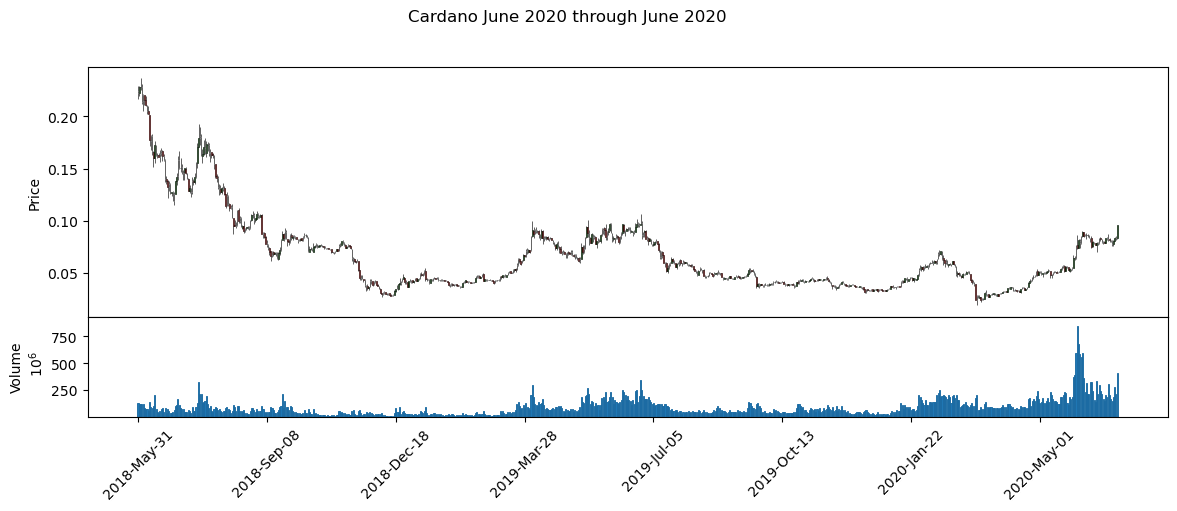

C:\Users\terre\anaconda3\envs\PythonData\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


In [96]:
#Cardano price and volume june 2018 - june 2020
cardano_june20 =data.DataReader("ADA-USD", "yahoo", "2018-06-01","2020-06-30")

#plot
cardano_june20_plot = mpf.plot(cardano_june20, type='candle', title='Cardano June 2020 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
cardano_june20_plot = mpf.plot(cardano_june20, type='candle', title='Cardano June 2020 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/cardano_june2018-2020.png"))

## Statistical Anaylsis

In [97]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency high
crypto_high_mean = crypto_high.mean()
crypto_high_median = crypto_high.median()
crypto_high_variance = crypto_high.var()
crypto_high_std = crypto_high.std()
crypto_high_sem = crypto_high.sem()

#create Dataframe
crypto_high_stats = pd.DataFrame({"Mean": crypto_high_mean,"Median": crypto_high_median, "Variance":crypto_high_variance, "Standard Deviation": crypto_high_std, "Standard Error of the Mean":crypto_high_sem})

#save to csv
crypto_high_stats.to_csv("output/crypto_high_stats.csv")

#display
crypto_high_stats

Mean       Median      Variance  Standard Deviation  \
Symbols                                                                     
Bitcoin High   7444.047734  7427.385742  5.139878e+06         2267.129828   
Ethereum High   220.907715   195.147934  1.042454e+04          102.100624   
Dogecoin High     0.002852     0.002583  8.920380e-07            0.000944   
Cardano High      0.068951     0.055928  1.412334e-03            0.037581   

               Standard Error of the Mean  
Symbols                                    
Bitcoin High                    82.183392  
Ethereum High                    3.701145  
Dogecoin High                    0.000034  
Cardano High                     0.001362

In [98]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency low
crypto_low_mean = crypto_low.mean()
crypto_low_median = crypto_low.median()
crypto_low_variance = crypto_low.var()
crypto_low_std = crypto_low.std()
crypto_low_sem = crypto_low.sem()

#create Dataframe
crypto_low_stats = pd.DataFrame({"Mean": crypto_low_mean,"Median": crypto_low_median, "Variance":crypto_low_variance, "Standard Deviation": crypto_low_std, "Standard Error of the Mean":crypto_low_sem})

#save to csv
crypto_low_stats.to_csv("output/crypto_low_stats.csv")

#display
crypto_low_stats

Mean       Median      Variance  Standard Deviation  \
Symbols                                                                    
Bitcoin Low   7137.763140  7170.922852  4.614208e+06         2148.070823   
Ethereum Low   209.078151   185.086319  9.396720e+03           96.936680   
Dogecoin Low     0.002690     0.002471  7.474941e-07            0.000865   
Cardano Low      0.064235     0.051520  1.208255e-03            0.034760   

              Standard Error of the Mean  
Symbols                                   
Bitcoin Low                    77.867507  
Ethereum Low                    3.513952  
Dogecoin Low                    0.000031  
Cardano Low                     0.001260

In [99]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency volume
crypto_volume_mean = crypto_volume.mean()
crypto_volume_median = crypto_volume.median()
crypto_volume_variance = crypto_volume.var()
crypto_volume_std = crypto_volume.std()
crypto_volume_sem = crypto_volume.sem()

#create Dataframe
crypto_volume_stats = pd.DataFrame({"Mean": crypto_volume_mean,"Median": crypto_volume_median, "Variance":crypto_volume_variance, "Standard Seviation": crypto_volume_std, "Standard Error of the Mean":crypto_volume_sem})

#save to csv
crypto_volume_stats.to_csv("output/crypto_volume_stats.csv")

#display
crypto_volume_stats

Mean        Median      Variance  Standard Seviation  \
Symbols                                                                         
Bitcoin Volume   1.769974e+10  1.562702e+10  1.767691e+20        1.329545e+10   
Ethereum Volume  7.379228e+09  6.658100e+09  3.257107e+19        5.707107e+09   
Dogecoin Volume  6.542154e+07  3.814386e+07  4.514513e+15        6.719013e+07   
Cardano Volume   9.003584e+07  6.654359e+07  6.816247e+15        8.256056e+07   

                 Standard Error of the Mean  
Symbols                                      
Bitcoin Volume                 4.819599e+08  
Ethereum Volume                2.068825e+08  
Dogecoin Volume                2.435640e+06  
Cardano Volume                 2.992818e+06

## Dow 

In [100]:
#DOW JONES ticker symbol is ^DJI
#NASDAQ ticker symbol is ^IXIC
#creat a list of Dow Jones and NASDAQ
stock_indexes_list =["^DJI","^IXIC"]

#creat dataframe two indexes
stock_indexes_list_df = data.DataReader(stock_indexes_list, "yahoo", start_d,end_d)

#filter out daily high price
stock_indexes_list_high = stock_indexes_list_df.High.round(2).rename(columns={"^DJI": "Dow Jones High", "^IXIC":"NASDAQ High"})

#save to csv
stock_indexes_list_high.to_csv("output/stock_indexes_high.csv")

#Display
stock_indexes_list_high.head()

Symbols     Dow Jones High  NASDAQ High
Date                                   
2018-06-01        24673.60      7557.38
2018-06-04        24859.37      7607.17
2018-06-05        24838.78      7644.48
2018-06-06        25146.46      7691.65
2018-06-07        25326.09      7697.41

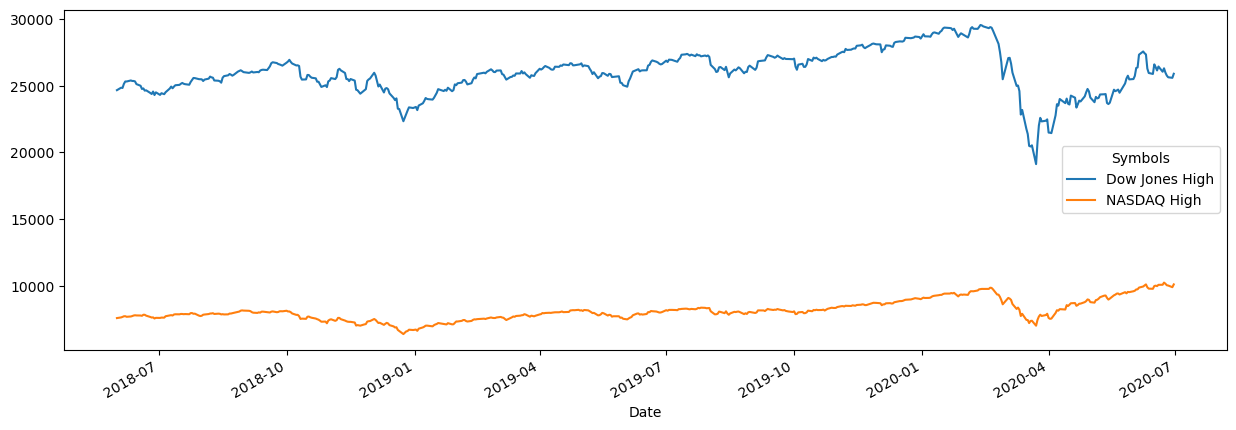

In [101]:
stock_indexes_list_high[["Dow Jones High","NASDAQ High"]].plot(figsize=(15,5))

In [102]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ high price
stock_indexes_list_high_mean = stock_indexes_list_high.mean()
stock_indexes_list_high_median = stock_indexes_list_high.median()
stock_indexes_list_high_variance = stock_indexes_list_high.var()
stock_indexes_list_high_std = stock_indexes_list_high.std()
stock_indexes_list_high_sem = stock_indexes_list_high.sem()

#create Dataframe
stock_indexes_list_high_stats = pd.DataFrame({"Mean": stock_indexes_list_high_mean,"Median": stock_indexes_list_high_median, "Variance":stock_indexes_list_high_variance, "Standard Deviation": stock_indexes_list_high_std, "Standard Error of the Mean":stock_indexes_list_high_sem})

#save to csv
stock_indexes_list_high_stats.to_csv("output/stock_indexes_high_stats.csv")

#display
stock_indexes_list_high_stats

Mean    Median      Variance  Standard Deviation  \
Symbols                                                                    
Dow Jones High  26007.732328  26029.02  2.614745e+06         1617.017169   
NASDAQ High      8123.767595   7992.81  5.646125e+05          751.406989   

                Standard Error of the Mean  
Symbols                                     
Dow Jones High                   70.639723  
NASDAQ High                      32.825367

In [103]:
#filter out daily low
stock_indexes_list_low = stock_indexes_list_df.Low.round(2).rename(columns={"^DJI": "Dow Jones Low", "^IXIC":"NASDAQ Low"})

#save to csv
stock_indexes_list_low.to_csv("output/stock_indexes_low.csv")

#Display
stock_indexes_list_low.head()

Symbols     Dow Jones Low  NASDAQ Low
Date                                 
2018-06-01       24542.09     7487.23
2018-06-04       24722.14     7561.20
2018-06-05       24710.82     7602.38
2018-06-06       24854.14     7622.31
2018-06-07       25164.48     7597.66

In [104]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ low
stock_indexes_list_low_mean = stock_indexes_list_low.mean()
stock_indexes_list_low_median = stock_indexes_list_low.median()
stock_indexes_list_low_variance = stock_indexes_list_low.var()
stock_indexes_list_low_std = stock_indexes_list_low.std()
stock_indexes_list_low_sem = stock_indexes_list_low.sem()

#create Dataframe
stock_indexes_list_low_stats = pd.DataFrame({"Mean": stock_indexes_list_low_mean,"Median": stock_indexes_list_low_median, "Variance":stock_indexes_list_low_variance, "Standard Deviation": stock_indexes_list_low_std, "Standard Error of the Mean":stock_indexes_list_low_sem})

#save to csv
stock_indexes_list_low_stats.to_csv("output/stock_indexes_low_stats.csv")
#Display

#display
stock_indexes_list_low_stats

Mean     Median      Variance  Standard Deviation  \
Symbols                                                                    
Dow Jones Low  25680.247405  25734.545  3.122675e+06         1767.109133   
NASDAQ Low      8007.239008   7899.600  5.708795e+05          755.565695   

               Standard Error of the Mean  
Symbols                                    
Dow Jones Low                   77.196521  
NASDAQ Low                      33.007041

In [105]:
#filter out daily volume
stock_indexes_list_volume = stock_indexes_list_df.Volume.rename(columns={"^DJI": "Dow Jones Volume", "^IXIC":"NASDAQ Volume"})

#save to csv
stock_indexes_list_volume.to_csv("output/stock_indexes_volume.csv")

#Display
stock_indexes_list_volume.head()

Symbols     Dow Jones Volume  NASDAQ Volume
Date                                       
2018-06-01         315710000     2208600000
2018-06-04         340400000     2142790000
2018-06-05         306340000     2058630000
2018-06-06         316090000     2191750000
2018-06-07         357680000     2328280000

In [106]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ volume
stock_indexes_list_volume_mean = stock_indexes_list_volume.mean()
stock_indexes_list_volume_median = stock_indexes_list_volume.median()
stock_indexes_list_volume_variance = stock_indexes_list_volume.var()
stock_indexes_list_volume_std = stock_indexes_list_volume.std()
stock_indexes_list_volume_sem = stock_indexes_list_volume.sem()

#create Dataframe
stock_indexes_list_volume_stats = pd.DataFrame({"Mean": stock_indexes_list_volume_mean,"Median": stock_indexes_list_volume_median, "Variance":stock_indexes_list_volume_variance, "Standard Deviation": stock_indexes_list_volume_std, "Standard Error of the Mean":stock_indexes_list_volume_sem})

#save to csv
stock_indexes_list_volume_stats.to_csv("output/stock_indexes_volume_stats.csv")

#display
stock_indexes_list_volume_stats

Mean        Median      Variance  \
Symbols                                                      
Dow Jones Volume  3.295807e+08  2.915700e+08  1.661604e+16   
NASDAQ Volume     2.564819e+09  2.256890e+09  8.682351e+17   

                  Standard Deviation  Standard Error of the Mean  
Symbols                                                           
Dow Jones Volume        1.289032e+08                5.631163e+06  
NASDAQ Volume           9.317914e+08                4.070549e+07

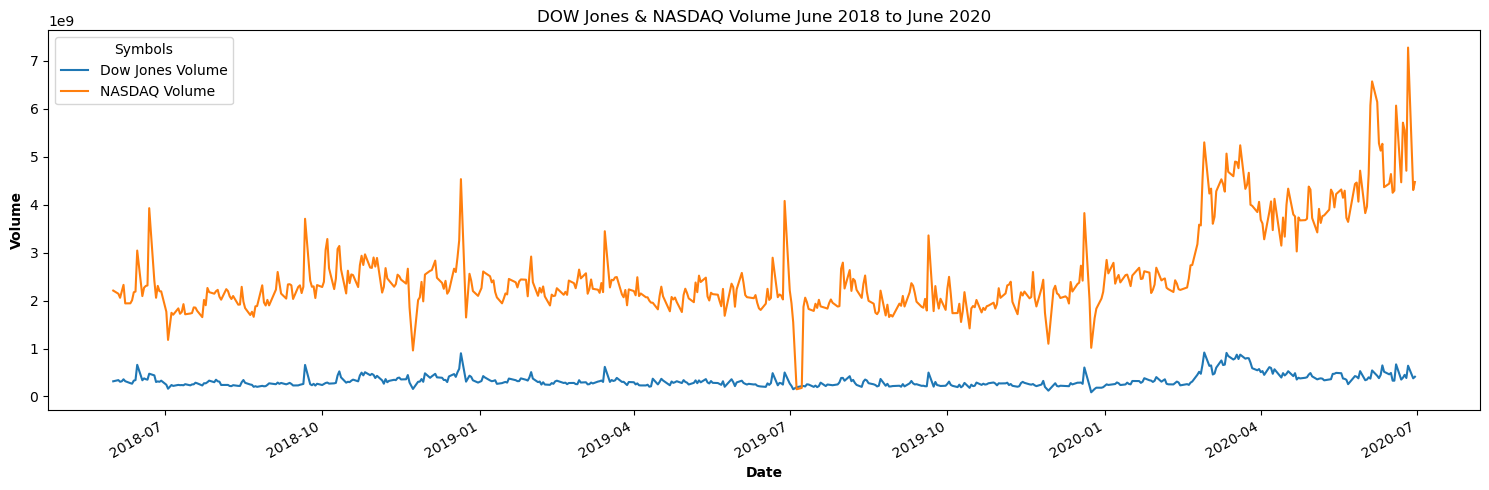

In [107]:
#Plot and set axises
two_yr_stock_indexes_volume = stock_indexes_list_volume[["Dow Jones Volume","NASDAQ Volume"]].plot(figsize=(15,5),title = "DOW Jones & NASDAQ Volume June 2018 to June 2020")
two_yr_stock_indexes_volume.set_xlabel("Date",fontweight="bold")
two_yr_stock_indexes_volume.set_ylabel("Volume",fontweight="bold")

#save plot
plt.savefig("output/june2018_thru_june202_socke_indexes_volume.png")

#display
two_yr_stock_indexes_volume
plt.tight_layout()

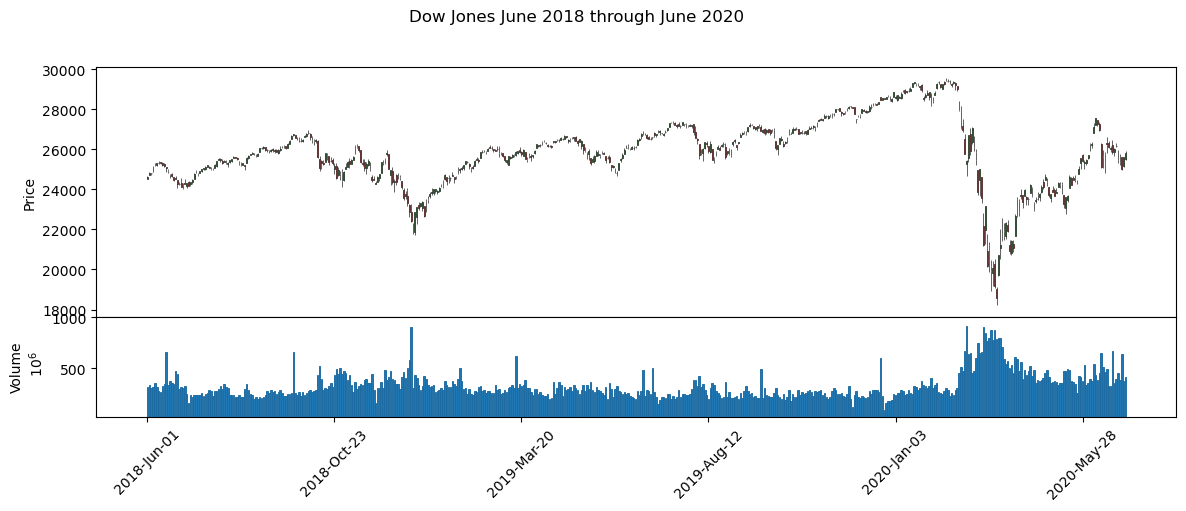

In [108]:
#Dow Jones price and volume june 2018 -june 2020
dow_june20 =data.DataReader("^DJI", "yahoo", "2018-06-01","2020-06-30")

#plot
dow_june20_plot = mpf.plot(dow_june20, type='candle', title='Dow Jones June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
dow_june20_plot = mpf.plot(dow_june20, type='candle', title='Dow Jones June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/dow_june2018-2020.png"))

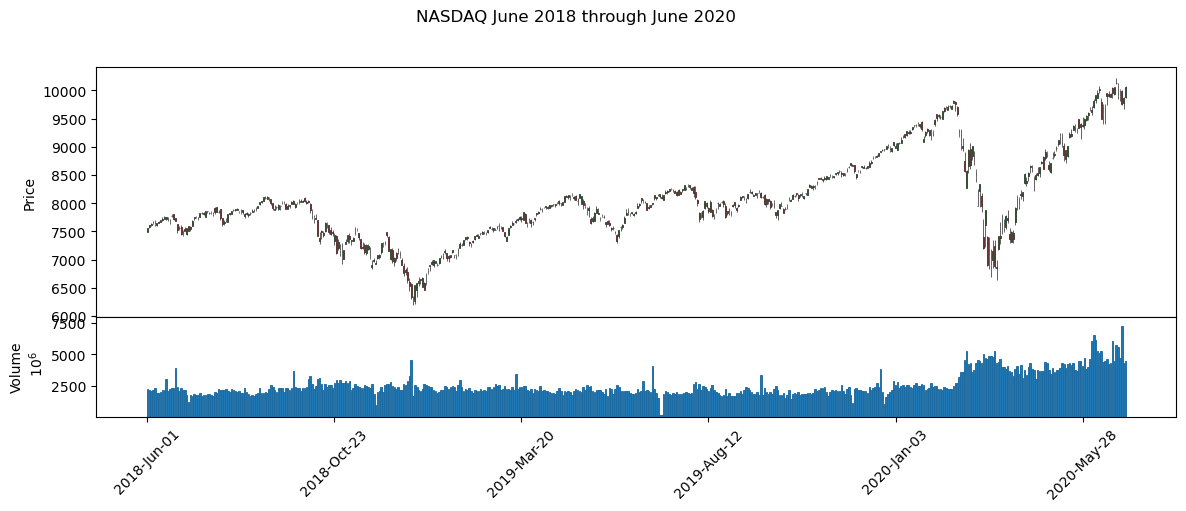

In [109]:
#NASDAQ price and volume june 2018 - june 2020
nasdaq_june20 =data.DataReader("^IXIC", "yahoo", "2018-06-01","2020-06-30")

#plot
nasdaq_june20_plot = mpf.plot(nasdaq_june20, type='candle', title='NASDAQ June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
nasdaq_june20_plot = mpf.plot(nasdaq_june20, type='candle', title='NASDAQ June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/nasdaq_june2018-2020.png"))

In [110]:

#NASDAQ ticker symbol is BTC-USD
#creat a list Bitcoin close price only
correlation_list =["BTC-USD"]

#creat dataframe 
bitcoin_df = data.DataReader("BTC-USD", "yahoo", "2018-06-01","2020-06-30")

#filter out daily close price
bitcoin_correlation_df = bitcoin_df.Close.round(2).rename({"BTC-USD":"Bitcoin Close Price"})

#save to csv
bitcoin_correlation_df.to_csv("output/bitcoin_correlation_df.csv")

#Display
bitcoin_correlation_df


Date
2018-05-31    7541.45
2018-06-01    7643.45
2018-06-02    7720.25
2018-06-03    7514.47
2018-06-04    7633.76
               ...   
2020-06-26    9045.39
2020-06-27    9143.58
2020-06-28    9190.85
2020-06-29    9137.99
2020-06-30    9228.33
Name: Close, Length: 761, dtype: float64

In [111]:
#DOW JONES ticker symbol is ^DJI
#creat a list Dow Jones close price only
dow_df = data.DataReader("^DJI", "yahoo", "2018-06-01","2020-06-30")

#filter out daily close price
dow_correlation_df = dow_df.Close.round(2).rename({"^DJI":"Dow Jones Close Price"})

#save to csv
dow_correlation_df.to_csv("output/dow_correlation_df.csv")

#Display
dow_correlation_df

Date
2018-06-01    24635.21
2018-06-04    24813.69
2018-06-05    24799.98
2018-06-06    25146.39
2018-06-07    25241.41
                ...   
2020-06-24    25445.94
2020-06-25    25745.60
2020-06-26    25015.55
2020-06-29    25595.80
2020-06-30    25812.88
Name: Close, Length: 524, dtype: float64

In [112]:
#merge bitcoin and dow by date
merged_correlation_df = pd.merge(bitcoin_correlation_df, dow_correlation_df, on='Date')
merged_correlation_df

Close_x   Close_y
Date                         
2018-06-01  7643.45  24635.21
2018-06-04  7633.76  24813.69
2018-06-05  7653.98  24799.98
2018-06-06  7678.24  25146.39
2018-06-07  7624.92  25241.41
...             ...       ...
2020-06-24  9264.81  25445.94
2020-06-25  9162.92  25745.60
2020-06-26  9045.39  25015.55
2020-06-29  9137.99  25595.80
2020-06-30  9228.33  25812.88

[523 rows x 2 columns]

In [113]:
#rename columns 
clean_correlation_close = merged_correlation_df.rename(columns={"Close_x": "Bitcoin Close Price", "Close_y": "Dow Jones Close Price"})
clean_correlation_close

Bitcoin Close Price  Dow Jones Close Price
Date                                                  
2018-06-01              7643.45               24635.21
2018-06-04              7633.76               24813.69
2018-06-05              7653.98               24799.98
2018-06-06              7678.24               25146.39
2018-06-07              7624.92               25241.41
...                         ...                    ...
2020-06-24              9264.81               25445.94
2020-06-25              9162.92               25745.60
2020-06-26              9045.39               25015.55
2020-06-29              9137.99               25595.80
2020-06-30              9228.33               25812.88

[523 rows x 2 columns]

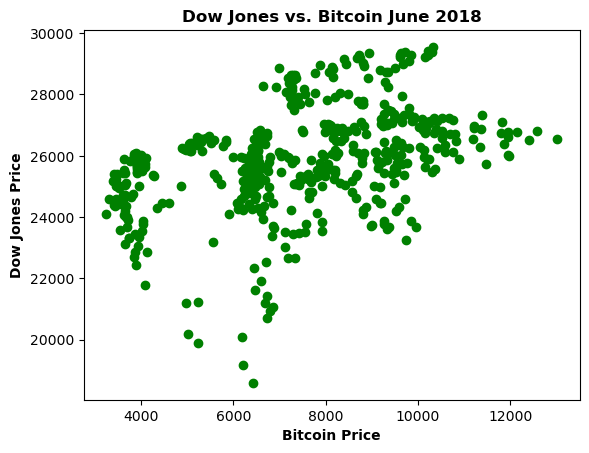

<Figure size 640x480 with 0 Axes>

In [114]:
#define axis
xaxis = clean_correlation_close["Bitcoin Close Price"]
yaxis = clean_correlation_close["Dow Jones Close Price"]

#plot chart and add labels and title to plot 
plt.scatter(xaxis, yaxis, facecolor= "green")
plt.xlabel("Bitcoin Price",fontweight="bold")
plt.ylabel("Dow Jones Price",fontweight="bold")
plt.title("Dow Jones vs. Bitcoin June 2018",fontweight="bold")

# Save the figure
plt.savefig("output/dow_vs_bitcoin.png")

# Display plot
plt.show()
plt.tight_layout()


In [116]:
#compute the Pearson correlation coefficient between 
correlation = st.pearsonr(xaxis,yaxis)

#Print
print(f"The correlation between Bitcoin and the Dow Jones in June 1, 2018 to June 30, 2020 is {correlation[0]}")

The correlation between Bitcoin and the Dow Jones in June 1, 2018 to June 30, 2020 is 0.4108021813174202
